# One vs rest

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [75]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [76]:
def optimizar(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    theta = (1/m)*(x_train.T @ (sigma-y_train))
    return theta

In [77]:
def costo(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    error = (y_train*np.log(sigma) + (1-y_train)*np.log(1-sigma))
    return np.sum(error, axis= 0)

In [78]:
iris = datasets.load_iris()

In [79]:
x = iris["data"][::]
y = (iris["target"]).astype(np.int32).reshape(len(iris['target']),1)

In [80]:

for i in range(x.shape[1]):
    max = x[:,i].max()
    min = x[:,i].min()
    x[:,i] = (x[:,i] - min)/(max - min)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [82]:
X_b = np.c_[np.ones((len(x_train),1)), x_train]
x_test = np.c_[np.ones((len(x_test),1)), x_test]

In [83]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [84]:
theta_setosa = np.random.randn(5).reshape(5,1)
theta_setosa

array([[ 0.47581729],
       [-0.07141046],
       [ 0.01510036],
       [-0.79242523],
       [-0.0574935 ]])

In [85]:
eta = 0.8
n_iter = 10000

J_set = np.zeros(n_iter)
m = len(x_train)
y_train_set = (y_train == 0).astype(int)
for i in range(n_iter):
    J_set[i] = -(1/m)*costo(theta_setosa, X_b, y_train_set)
    theta_setosa = theta_setosa - eta * optimizar(theta_setosa, X_b, y_train_set)
theta_setosa

array([[  3.68545374],
       [ -4.61319167],
       [  8.71305401],
       [-11.55863688],
       [-10.92059693]])

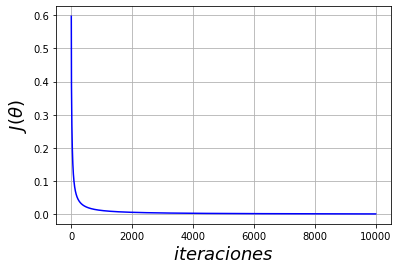

In [86]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [87]:
y_proba_set =np.round(sigmoid(theta_setosa.T @ x_test.T),2)
y_proba_set

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.01, 0.  ,
        0.  , 1.  , 0.  , 0.99, 1.  , 0.  , 0.  , 0.  , 0.95, 0.  , 0.  ,
        0.99, 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.99, 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.  , 1.  ]])

In [88]:
theta_versicolor = np.random.randn(5).reshape(5,1)
theta_versicolor

array([[-0.38409884],
       [-1.66361462],
       [-0.71938513],
       [-0.17564737],
       [-0.47263309]])

In [89]:
eta = 0.8
n_iter = 10000

J_vers = np.zeros(n_iter)

y_train_ver = (y_train == 1).astype(int)
for i in range(n_iter):
    J_vers[i] = -(1/m)*costo(theta_versicolor, X_b, y_train_ver)
    theta_versicolor = theta_versicolor - eta * optimizar(theta_versicolor, X_b, y_train_ver)
theta_versicolor

array([[ 2.06365865],
       [ 1.34296335],
       [-7.3402328 ],
       [ 3.56692447],
       [-4.13682297]])

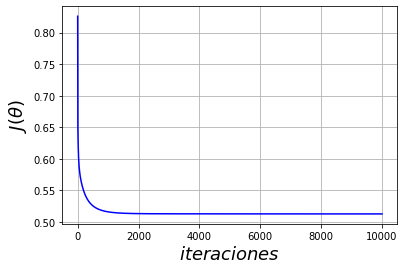

In [90]:
plt.plot(np.arange(n_iter), J_vers, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [91]:
y_proba_ver =np.round(sigmoid(theta_versicolor.T @ x_test.T),2)
y_proba_ver

array([[0.41, 0.58, 0.17, 0.29, 0.31, 0.31, 0.07, 0.04, 0.21, 0.78, 0.39,
        0.39, 0.17, 0.52, 0.06, 0.05, 0.06, 0.48, 0.16, 0.74, 0.54, 0.49,
        0.13, 0.16, 0.03, 0.7 , 0.14, 0.26, 0.46, 0.37, 0.46, 0.55, 0.16,
        0.55, 0.05, 0.39, 0.91, 0.02]])

In [92]:
theta_virginica = np.random.randn(5).reshape(5,1)
theta_virginica

array([[-0.81848296],
       [ 1.13874778],
       [ 0.26798826],
       [ 0.16430056],
       [ 0.28891529]])

In [93]:
eta = 0.8
n_iter = 10000

J_vir = np.zeros(n_iter)

y_train_vir = (y_train == 2).astype(int)
for i in range(n_iter):
    J_vir[i] = -(1/m)*costo(theta_virginica, X_b, y_train_vir)
    theta_virginica = theta_virginica - eta * optimizar(theta_virginica, X_b, y_train_vir)
theta_virginica

array([[-21.012949  ],
       [ -4.06320877],
       [ -5.7744216 ],
       [ 18.24506671],
       [ 20.47454424]])

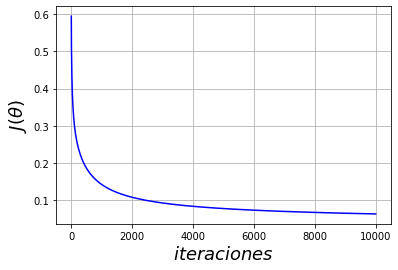

In [94]:
plt.plot(np.arange(n_iter), J_vir, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [95]:
y_proba_vir = np.round(sigmoid(theta_virginica.T @ x_test.T),2)
y_proba_vir

array([[0.93, 0.  , 1.  , 0.75, 0.11, 0.99, 0.  , 0.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 0.83, 0.  , 0.  , 1.  , 0.96, 0.99, 0.  , 1.  , 0.01,
        0.  , 0.63, 0.  , 0.02, 0.  , 0.  , 0.97, 0.  , 0.97, 0.09, 0.99,
        0.03, 0.  , 0.94, 0.  , 0.  ]])

In [96]:
compar = np.concatenate((y_proba_set, y_proba_ver, y_proba_vir), axis =0).T
compar

array([[0.  , 0.41, 0.93],
       [0.  , 0.58, 0.  ],
       [0.  , 0.17, 1.  ],
       [0.  , 0.29, 0.75],
       [0.  , 0.31, 0.11],
       [0.  , 0.31, 0.99],
       [1.  , 0.07, 0.  ],
       [1.  , 0.04, 0.  ],
       [0.  , 0.21, 1.  ],
       [0.01, 0.78, 0.  ],
       [0.  , 0.39, 1.  ],
       [0.  , 0.39, 1.  ],
       [1.  , 0.17, 0.  ],
       [0.  , 0.52, 0.83],
       [0.99, 0.06, 0.  ],
       [1.  , 0.05, 0.  ],
       [0.  , 0.06, 1.  ],
       [0.  , 0.48, 0.96],
       [0.  , 0.16, 0.99],
       [0.95, 0.74, 0.  ],
       [0.  , 0.54, 1.  ],
       [0.  , 0.49, 0.01],
       [0.99, 0.13, 0.  ],
       [0.  , 0.16, 0.63],
       [1.  , 0.03, 0.  ],
       [0.  , 0.7 , 0.02],
       [1.  , 0.14, 0.  ],
       [1.  , 0.26, 0.  ],
       [0.  , 0.46, 0.97],
       [0.99, 0.37, 0.  ],
       [0.  , 0.46, 0.97],
       [0.  , 0.55, 0.09],
       [0.  , 0.16, 0.99],
       [0.  , 0.55, 0.03],
       [1.  , 0.05, 0.  ],
       [0.  , 0.39, 0.94],
       [0.  , 0.91, 0.  ],
 

In [97]:

prediction_final = []
for i in range(len(compar)):
    #print(compar[i])
    index_value = compar[i].argmax()
    prediction_final.append(index_value)
prediction_final = np.array(prediction_final).reshape(1, len(prediction_final))


In [98]:
last_data = np.concatenate((y_proba_set, y_proba_ver, y_proba_vir, prediction_final, y_test.reshape(1, len(y_test)) ), axis =0).T
last_data

array([[0.  , 0.41, 0.93, 2.  , 2.  ],
       [0.  , 0.58, 0.  , 1.  , 1.  ],
       [0.  , 0.17, 1.  , 2.  , 2.  ],
       [0.  , 0.29, 0.75, 2.  , 2.  ],
       [0.  , 0.31, 0.11, 1.  , 1.  ],
       [0.  , 0.31, 0.99, 2.  , 2.  ],
       [1.  , 0.07, 0.  , 0.  , 0.  ],
       [1.  , 0.04, 0.  , 0.  , 0.  ],
       [0.  , 0.21, 1.  , 2.  , 2.  ],
       [0.01, 0.78, 0.  , 1.  , 1.  ],
       [0.  , 0.39, 1.  , 2.  , 2.  ],
       [0.  , 0.39, 1.  , 2.  , 2.  ],
       [1.  , 0.17, 0.  , 0.  , 0.  ],
       [0.  , 0.52, 0.83, 2.  , 2.  ],
       [0.99, 0.06, 0.  , 0.  , 0.  ],
       [1.  , 0.05, 0.  , 0.  , 0.  ],
       [0.  , 0.06, 1.  , 2.  , 2.  ],
       [0.  , 0.48, 0.96, 2.  , 2.  ],
       [0.  , 0.16, 0.99, 2.  , 2.  ],
       [0.95, 0.74, 0.  , 0.  , 0.  ],
       [0.  , 0.54, 1.  , 2.  , 2.  ],
       [0.  , 0.49, 0.01, 1.  , 1.  ],
       [0.99, 0.13, 0.  , 0.  , 0.  ],
       [0.  , 0.16, 0.63, 2.  , 1.  ],
       [1.  , 0.03, 0.  , 0.  , 0.  ],
       [0.  , 0.7 , 0.02,

In [99]:
cm = confusion_matrix(y_test, prediction_final.flatten())
cm

array([[13,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 16]], dtype=int64)

In [100]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total

0.9736842105263158

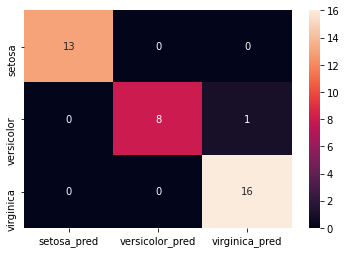

In [101]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
f = sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [102]:
print(classification_report(y_test,  prediction_final.flatten(), target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.89      0.94         9
   virginica       0.94      1.00      0.97        16

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38

